**Exploratory Data Anaysis**

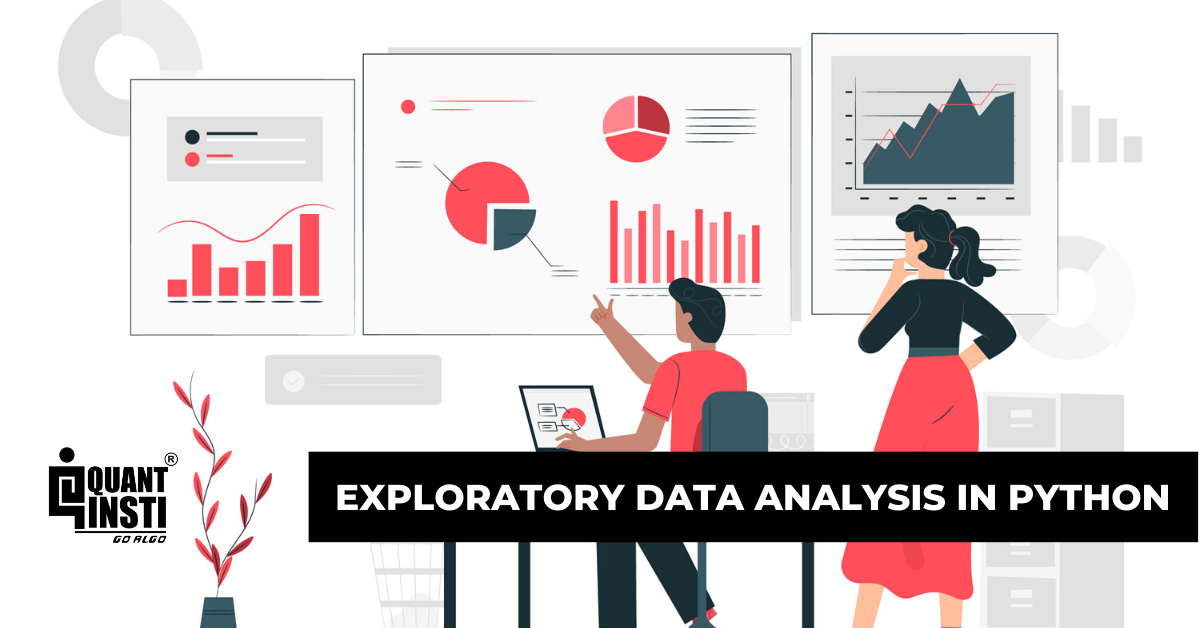

**Introduction**

**What is Exploratory Data Analysis?**

Exploratory Data Analysis or (EDA) is understanding the data sets by summarizing their main characteristics often plotting them visually. This step is very important especially when we arrive at modeling the data in order to apply Machine learning. Plotting in EDA consists of Histograms, Box plot, Scatter plot and many more. It often takes much time to explore the data. Through the process of EDA, we can ask to define the problem statement or definition on our data set which is very important.

**How to perform Exploratory Data Analysis?**

This is one such question that everyone is keen on knowing the answer. Well, the answer is it depends on the data set that you are working. There is no one method or common methods in order to perform EDA, whereas in this tutorial you can understand some common methods and plots that would be used in the EDA process.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
from google.colab import files
uploaded=files.upload() 

Saving data.csv to data.csv


Loading data into the data frame

In [7]:
import io
df=pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [8]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [9]:
df.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


1.2 Cheking the types of data and summary stats

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [11]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


Dropping irrelevant columns

In [12]:
df=df.drop(['Engine Fuel Type','Number of Doors','Market Category'],axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


3. Renaming the columns

In [13]:
df=df.rename(columns={"Engine HP":"HP","Engine Cylinders":"Cylinders","Transmission Type":"Transmission","Driven_Wheels":"Drive mode","highway MPG":"MPG-H","city mpg":"MPG-C","MSRP":"Price"})
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


4. Dropping the Duplicate Rows

In [14]:
df.shape

(11914, 13)

In [15]:
duplicate_rows_df=df[df.duplicated()]
print("no.of duplicate rows:",duplicate_rows_df)

no.of duplicate rows:          Make     Model  Year     HP  ...  MPG-H MPG-C Popularity  Price
14        BMW  1 Series  2013  230.0  ...     28    19       3916  31500
18       Audi       100  1992  172.0  ...     24    17       3105   2000
20       Audi       100  1992  172.0  ...     24    17       3105   2000
24       Audi       100  1993  172.0  ...     24    17       3105   2000
25       Audi       100  1993  172.0  ...     24    17       3105   2000
...       ...       ...   ...    ...  ...    ...   ...        ...    ...
11481  Suzuki      X-90  1998   95.0  ...     26    22        481   2000
11603   Volvo      XC60  2017  302.0  ...     29    20        870  46350
11604   Volvo      XC60  2017  240.0  ...     30    23        870  40950
11708  Suzuki       XL7  2008  252.0  ...     22    15        481  29149
11717  Suzuki       XL7  2008  252.0  ...     22    16        481  27499

[792 rows x 13 columns]


In [16]:
df=df.drop_duplicates()
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [17]:
df.shape

(11122, 13)

4.1 Dropping the missing or null values

In [18]:
print(df.isnull().sum())

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
Price             0
dtype: int64


In [19]:
df=df.dropna()    #dropping missing values
df.count()


Make             11024
Model            11024
Year             11024
HP               11024
Cylinders        11024
Transmission     11024
Drive mode       11024
Vehicle Size     11024
Vehicle Style    11024
MPG-H            11024
MPG-C            11024
Popularity       11024
Price            11024
dtype: int64

In [20]:
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Drive mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64


5.Detecting Outliers

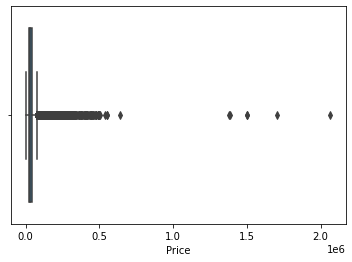

In [21]:
sns.boxplot(x=df['Price'])

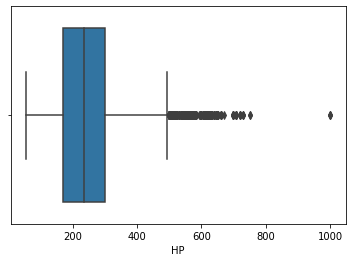

In [22]:
sns.boxplot(x=df['HP'])

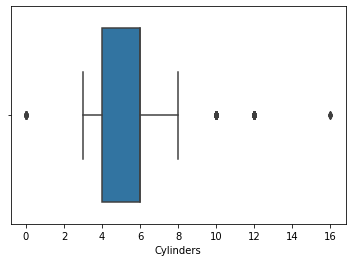

In [23]:
sns.boxplot(x=df['Cylinders'])

In [24]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Year              9.00
HP              131.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
Price         21426.25
dtype: float64


In [25]:
df=df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 *IQR))).any(axis=1)]
df.shape

(8546, 13)

6. Most car represented brands

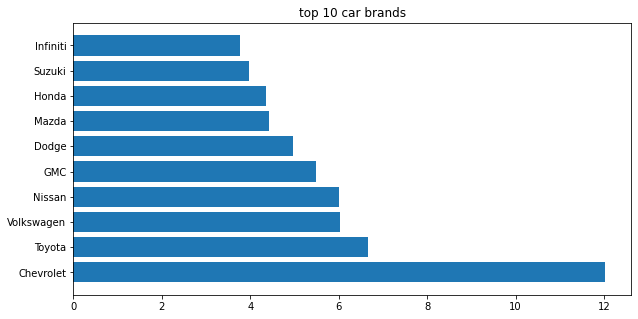

In [26]:
counts=df["Make"].value_counts()*100/sum(df['Make'].value_counts())
popular_labels=counts.index[:10]
plt.figure(figsize=(10,5))
plt.barh(popular_labels,width=counts[:10])
plt.title("top 10 car brands")
plt.show()


In [27]:
prices=df[["Make", "Price"]].loc[(df["Make"]=="Chevrolet")  |  (df["Make"]=="Ford")  |  (df["Make"]=="Volkswagan")  |  (df["Make"]=="Toyota")  |  (df["Make"]=="Dodge")  |  (df["Make"]=="Nissan")  |   (df["Make"]=="GMC")  |  (df["Make"]=="Mazda")].groupby('Make').mean() 
print(prices)

                  Price
Make                   
Chevrolet  28142.855891
Dodge      26076.722353
GMC        33261.400853
Mazda      20495.820106
Nissan     28352.543860
Toyota     27769.421793


7. Correlation Matrix

In [28]:
df.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.325104,-0.106597,0.373319,0.335236,0.200710,0.591439
HP,0.325104,1.000000,0.734094,-0.453451,-0.554768,0.095161,0.745852
Cylinders,-0.106597,0.734094,1.000000,-0.691395,-0.746361,0.013373,0.389049
MPG-H,0.373319,-0.453451,-0.691395,1.000000,0.936978,0.093002,-0.121262
MPG-C,0.335236,-0.554768,-0.746361,0.936978,1.000000,0.081110,-0.197330
Popularity,0.200710,0.095161,0.013373,0.093002,0.081110,1.000000,0.113604
Price,0.591439,0.745852,0.389049,-0.121262,-0.197330,0.113604,1.000000


8.Exploratory Data Analysis (Plot different features) 

Heatmap

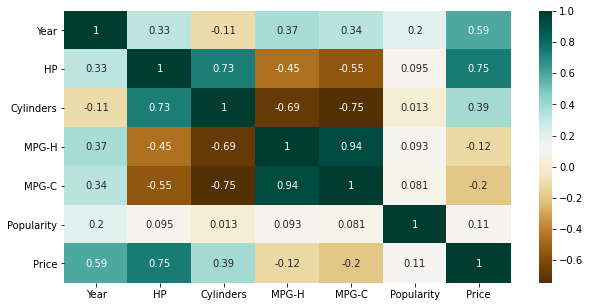

In [29]:
plt.figure(figsize=(10,5))
c=df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

ScatterPlot

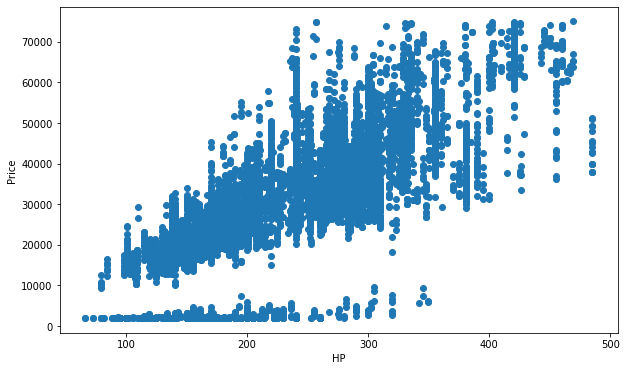

In [30]:
fig, ax=plt.subplots(figsize=(10,6))
ax.scatter(df['HP'],df["Price"])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

Vehicle style segment of cars sold the most

Text(0, 0.5, 'np.of vehicle')

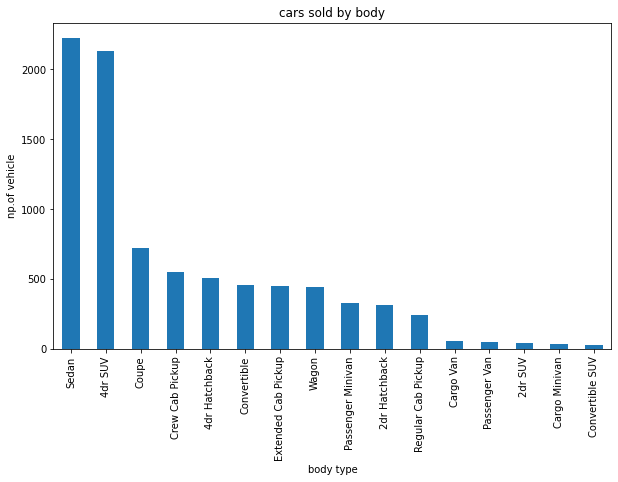

In [31]:
df["Vehicle Style"].value_counts().plot.bar(figsize=(10,6))
plt.title("cars sold by body")
plt.xlabel("body type")
plt.ylabel("np.of vehicle")

Text(0.5, 0, 'Count of Vehicles')

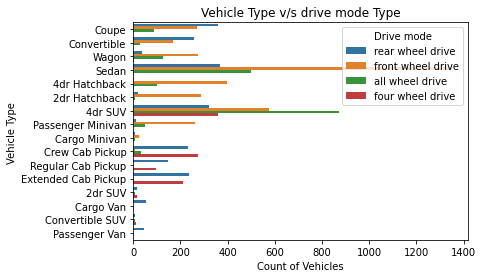

In [32]:
sns.countplot(y='Vehicle Style', data=df, hue="Drive mode")
plt.title("Vehicle Type v/s drive mode Type")
plt.ylabel("Vehicle Type ")
plt.xlabel("Count of Vehicles")

Making a new group "Price_group"

Text(0.5, 0, 'PriceGroup')

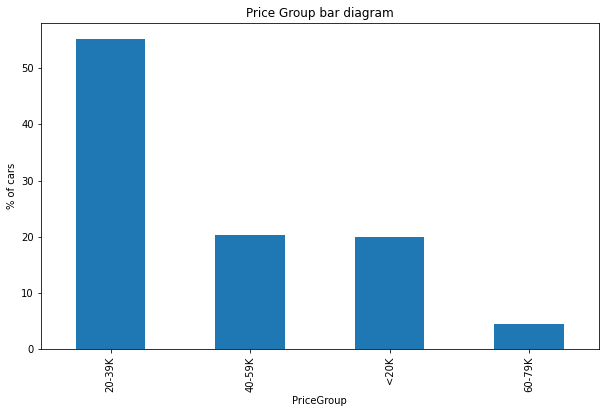

In [33]:
df["Price_Group"]=pd.cut(df["Price"],[0,20000,40000,60000,80000,100000,600000],
                         labels=['<20K','20-39K','40-59K','60-79K','80-99K','>100K'],include_lowest=True)
df["Price_Group"]=df["Price_Group"].astype(object)

(df["Price_Group"].value_counts()/ len(df)*100).plot.bar(figsize=(10,6))
plt.title("Price Group bar diagram")
plt.ylabel("% of cars")
plt.xlabel("PriceGroup")

9.Base ML Model

Linear Regressor

In [34]:
x=df[["Popularity","Year","HP","Cylinders","MPG-H","MPG-C"]].values
y=df["Price"].values

In [35]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()
x=sc_x.fit_transform(x)
x=sc_y.fit_transform(y.reshape(-1,1))

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [37]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

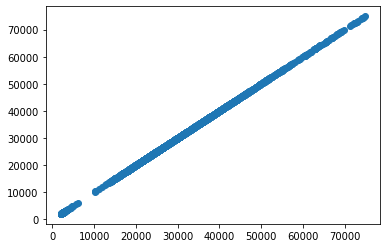

In [38]:
y_pred=regressor.predict(x_test)
plt.scatter(y_test,y_pred)

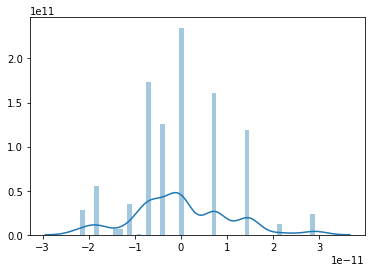

In [39]:
sns.distplot((y_test-y_pred),bins=50)

In [40]:
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2:",metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 7.930155557563952e-12
Root Mean Squared Error: 1.0560092619130053e-11
R2: 1.0


Support Vector Machine

In [41]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

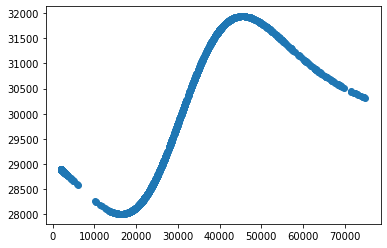

In [42]:
y_pred=regressor.predict(x_test)
plt.scatter(y_test,y_pred)

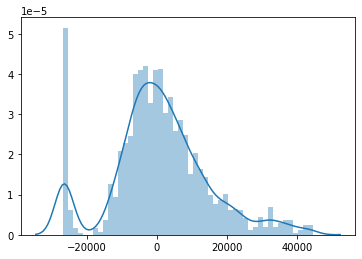

In [43]:
sns.distplot((y_test-y_pred),bins=50)

In [44]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2:",metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 10238.299252708483
Root Mean Squared Error: 13927.967555348452
R2: 0.13009155899076252


Random Forest Regressor

In [45]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=300,random_state=0)
regressor.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

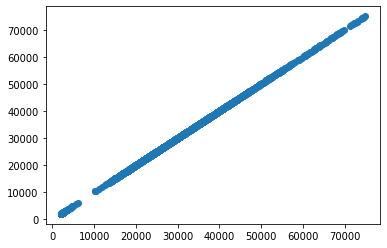

In [46]:
y_pred=regressor.predict(x_test)
plt.scatter(y_test,y_pred)

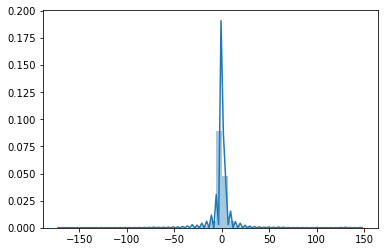

In [47]:
sns.distplot((y_test-y_pred),bins=50)

In [48]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2:",metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 3.7873157894736718
Root Mean Squared Error: 10.393606059500112
R2: 0.999999515570529
